## MNIST CNN

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *

### Data

In [4]:
path = untar_data(URLs.MNIST)

In [5]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/training'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing')]

In [6]:
il = ImageList.from_folder(path, convert_mode='L')

In [7]:
doc(ImageList.from_folder)

In [8]:
doc(ItemList)

In [9]:
len(il)

70000

In [10]:
il.items[0]

PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9/35174.png')

In [11]:
il.items

array([PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9/35174.png'),
       PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9/54905.png'),
       PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9/16734.png'),
       PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9/12074.png'), ...,
       PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/6/7576.png'),
       PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/6/6350.png'),
       PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/6/6294.png'),
       PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/6/5341.png')], dtype=object)

In [12]:
defaults.cmap='binary'

In [13]:
il

ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/jupyter/.fastai/data/mnist_png

In [14]:
type(il[4190])

fastai.vision.image.Image

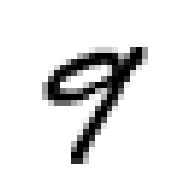

In [15]:
il[0].show()

In [16]:
sd = il.split_by_folder(train='training', valid='testing')

In [17]:
il

ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/jupyter/.fastai/data/mnist_png

In [18]:
sd

ItemLists;

Train: ImageList (60000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/jupyter/.fastai/data/mnist_png;

Valid: ImageList (10000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/jupyter/.fastai/data/mnist_png;

Test: None

In [19]:
(path/'training').ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/1'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/7'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/3'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/6')]

In [20]:
ll = sd.label_from_folder()

In [28]:
doc(sd.label_from_folder)

In [34]:
ll

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
9,9,9,9,9
Path: /home/jupyter/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
9,9,9,9,9
Path: /home/jupyter/.fastai/data/mnist_png;

Test: None

In [35]:
x,y = ll.train[0]

9 torch.Size([1, 28, 28])


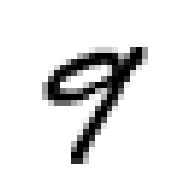

In [36]:
x.show()
print(y,x.shape)

In [39]:
tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])

In [37]:
doc(rand_pad)

In [40]:
ll = ll.transform(tfms)

In [38]:
doc(ll.transform)

In [41]:
bs = 128

In [42]:
# not using imagenet_stats because not using pretrained model
data = ll.databunch(bs=bs).normalize()

In [43]:
x,y = data.train_ds[0]

9


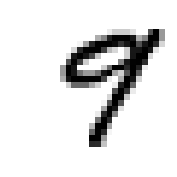

In [44]:
x.show()
print(y)

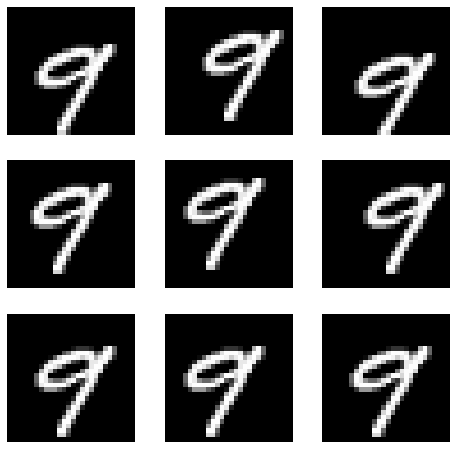

In [45]:
def _plot(i,j,ax): data.train_ds[0][0].show(ax, cmap='gray')
plot_multi(_plot, 3, 3, figsize=(8,8))

In [46]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

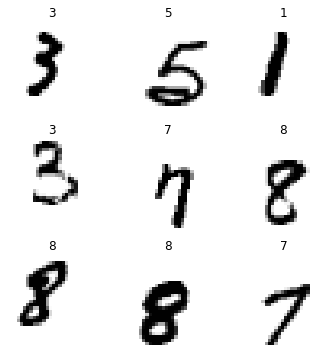

In [47]:
data.show_batch(rows=3, figsize=(5,5))

### Basic CNN with batchnorm

In [48]:
def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [49]:
model = nn.Sequential(
    conv(1, 8), # 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), # 7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), # 1
    nn.BatchNorm2d(10),
    Flatten()     # remove (1,1) grid
)

In [50]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [51]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          80         True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
Conv2d               [32, 4, 4]           4,640      True      
___________________________________________________

In [52]:
xb = xb.cuda()

In [53]:
model(xb).shape

torch.Size([128, 10])

In [54]:
learn.lr_find(end_lr=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


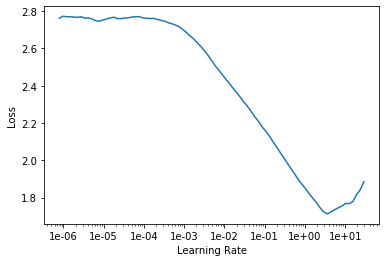

In [55]:
learn.recorder.plot()

In [56]:
learn.fit_one_cycle(3, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.234205,0.246489,0.918500,02:07
1,0.129602,0.094103,0.970600,00:09
2,0.074851,0.039053,0.987100,00:09


### Refactor

In [57]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

In [58]:
model = nn.Sequential(
    conv2(1, 8),   # 14
    conv2(8, 16),  # 7
    conv2(16, 32), # 4
    conv2(32, 16), # 2
    conv2(16, 10), # 1
    Flatten()      # remove (1,1) grid
)

In [59]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [60]:
learn.fit_one_cycle(10, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.233370,0.289992,0.908300,00:09
1,0.202610,0.151154,0.949400,00:10
2,0.167998,0.149256,0.949200,00:09
3,0.132031,0.226134,0.927100,00:10
4,0.120845,0.095386,0.970400,00:09
5,0.091130,0.061059,0.980600,00:09
6,0.082881,0.052134,0.984700,00:10
7,0.064380,0.039120,0.987600,00:09
8,0.055213,0.027867,0.990600,00:09
9,0.040929,0.026401,0.991000,00:09


### Resnet-ish

In [61]:
class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = conv_layer(nf,nf)
        self.conv2 = conv_layer(nf,nf)
        
    def forward(self, x): return x + self.conv2(self.conv1(x))

In [62]:
help(res_block)

Help on function res_block in module fastai.layers:

res_block(nf, dense: bool = False, norm_type: Union[fastai.layers.NormType, NoneType] = <NormType.Batch: 1>, bottle: bool = False, **conv_kwargs)
    Resnet block of `nf` features. `conv_kwargs` are passed to `conv_layer`.



In [63]:
model = nn.Sequential(
    conv2(1, 8),
    res_block(8),
    conv2(8, 16),
    res_block(16),
    conv2(16, 32),
    res_block(32),
    conv2(32, 16),
    res_block(16),
    conv2(16, 10),
    Flatten()
)

In [64]:
def conv_and_res(ni,nf): return nn.Sequential(conv2(ni, nf), res_block(nf))

In [65]:
model = nn.Sequential(
    conv_and_res(1, 8),
    conv_and_res(8, 16),
    conv_and_res(16, 32),
    conv_and_res(32, 16),
    conv2(16, 10),
    Flatten()
)

In [66]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


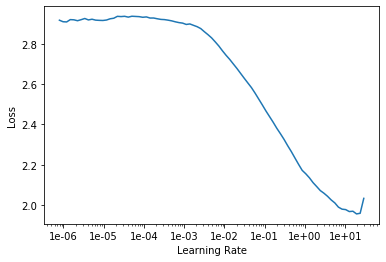

In [67]:
learn.lr_find(end_lr=100)
learn.recorder.plot()

In [68]:
learn.fit_one_cycle(12, max_lr=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.205955,0.282523,0.912900,00:13
1,0.135614,0.134598,0.959000,00:13
2,0.109299,0.127843,0.960200,00:13
3,0.086333,0.150351,0.949500,00:13
4,0.082667,0.143144,0.955900,00:14
5,0.060417,0.053993,0.983200,00:13
6,0.052492,0.067856,0.978900,00:13
7,0.043548,0.029088,0.991400,00:14
8,0.028522,0.024154,0.992300,00:13
9,0.026948,0.021758,0.993300,00:13


In [ ]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [128, 8, 14, 14]     72         True      
______________________________________________________________________
ReLU                 [128, 8, 14, 14]     0          False     
______________________________________________________________________
BatchNorm2d          [128, 8, 14, 14]     16         True      
______________________________________________________________________
Conv2d               [128, 8, 14, 14]     576        True      
______________________________________________________________________
ReLU                 [128, 8, 14, 14]     0          False     
______________________________________________________________________
BatchNorm2d          [128, 8, 14, 14]     16         True      
______________________________________________________________________
Conv2d               [128, 8, 14, 14]     576        True      
______________________________________________________________

## fin